## Importing Required Python Libraries for Data Analysis and PCA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Loading and Displaying the Cleaned Premier League Dataset

The data is loaded from the cleaned CSV file `cleaned-premier-label.csv` and displayed to get an overview of its contents.


In [2]:
df = pd.read_csv('../data/cleaned-premier-label.csv')
df

,date,season,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far,away_total_wins_so_far,away_total_draws_so_far,away_total_losses_so_far
0,2015-08-08,2015/2016,Bournemouth,Aston Villa,0,7.024,3.303,3.748,20,17,0,0,0,0,0,0
1,2015-08-08,2015/2016,Chelsea,Swansea,1,6.697,4.338,8.967,1,8,0,0,0,0,0,0
2,2015-08-08,2015/2016,Everton,Watford,1,6.842,3.514,4.852,11,19,0,0,0,0,0,0
3,2015-08-08,2015/2016,Leicester,Sunderland,2,7.000,3.207,3.742,14,16,0,0,0,0,0,0
4,2015-08-08,2015/2016,Man United,Tottenham,2,6.477,3.651,5.318,4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2019-05-12,2018/2019,Liverpool,Wolves,2,6.619,8.266,8.563,4,19,17,2,0,15,10,10
1242,2019-05-12,2018/2019,Man United,Cardiff,0,6.563,8.631,8.438,2,18,17,8,9,7,5,18
1243,2019-05-12,2018/2019,Southampton,Huddersfield,1,6.204,7.470,6.521,17,16,9,10,14,3,4,21
1244,2019-05-12,2018/2019,Tottenham,Everton,1,6.153,6.795,3.233,3,8,20,2,11,14,8,13


## Checking the Shape of the Dataset

Using `df.shape` to view the number of rows and columns in the dataset.


In [3]:
df.shape


(1246, 16)

## Dataset Information Overview

The `df.info()` method provides a concise summary of the dataset, including the number of non-null values, data types of each column, and overall structure.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1246 non-null   object 
 1   season                    1246 non-null   object 
 2   home_team                 1246 non-null   object 
 3   away_team                 1246 non-null   object 
 4   home_outcome              1246 non-null   int64  
 5   avg_odd_home_win          1246 non-null   float64
 6   avg_odd_draw              1246 non-null   float64
 7   avg_odd_away_win          1246 non-null   float64
 8   home_ranking              1246 non-null   int64  
 9   away_ranking              1246 non-null   int64  
 10  home_total_wins_so_far    1246 non-null   int64  
 11  home_total_draws_so_far   1246 non-null   int64  
 12  home_total_losses_so_far  1246 non-null   int64  
 13  away_total_wins_so_far    1246 non-null   int64  
 14  away_tot

## Statistical Summary of Numerical Features

The `df.describe()` method generates descriptive statistics of the dataset's numerical columns, such as mean, standard deviation, min, max, and quartiles.

In [5]:
df.describe()

,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far,away_total_wins_so_far,away_total_draws_so_far,away_total_losses_so_far
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,1.133226,7.274838,4.441469,3.684693,11.114767,10.463082,5.401284,4.509631,5.774478,5.521669,4.478331,5.555377
std,0.851120,1.043937,1.647506,1.604586,5.542721,5.693638,4.181174,2.974238,4.374224,4.220710,3.025848,4.431330
min,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
75%,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,8.000000,6.000000,9.000000,8.000000,6.000000,9.000000
max,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,20.000000,15.000000,21.000000,20.000000,15.000000,21.000000


## Calculating the Mean of All Numerical Columns

The `df.mean(numeric_only=True)` function computes the mean (average) value for each numerical column in the dataset.

In [6]:
# Finding the mean of all columns
column_means = df.mean(numeric_only=True)
print(column_means)

home_outcome                 1.133226
avg_odd_home_win             7.274838
avg_odd_draw                 4.441469
avg_odd_away_win             3.684693
home_ranking                11.114767
away_ranking                10.463082
home_total_wins_so_far       5.401284
home_total_draws_so_far      4.509631
home_total_losses_so_far     5.774478
away_total_wins_so_far       5.521669
away_total_draws_so_far      4.478331
away_total_losses_so_far     5.555377
dtype: float64


## Calculating the Median of All Numerical Columns

The `df.median(numeric_only=True)` function calculates the median value for each numerical column in the dataset, providing insight into the central tendency of the data.


In [7]:
# Finding the median of all columns
column_medians = df.median(numeric_only=True)
print(column_medians)

home_outcome                 1.000
avg_odd_home_win             7.056
avg_odd_draw                 3.535
avg_odd_away_win             3.197
home_ranking                11.000
away_ranking                10.000
home_total_wins_so_far       5.000
home_total_draws_so_far      4.000
home_total_losses_so_far     5.000
away_total_wins_so_far       5.000
away_total_draws_so_far      4.000
away_total_losses_so_far     5.000
dtype: float64


## Calculating the Mode of Each Column

The `df.mode()` function returns the most frequent value(s) for each column.  
If multiple modes exist, `iloc[0]` selects the first one for each column.


In [8]:
# Calculate the mode (most frequent value) for each column and select the first mode in case of multiple
single_mode = df.mode().iloc[0]
print(single_mode)

date                        2015-12-26
season                       2015/2016
home_team                      Everton
away_team                      Everton
home_outcome                       2.0
avg_odd_home_win                 6.515
avg_odd_draw                     3.172
avg_odd_away_win                 2.085
home_ranking                      11.0
away_ranking                       6.0
home_total_wins_so_far             0.0
home_total_draws_so_far            1.0
home_total_losses_so_far           0.0
away_total_wins_so_far             0.0
away_total_draws_so_far            1.0
away_total_losses_so_far           0.0
Name: 0, dtype: object


## Histogram and KDE Plot for Betting Odds

For each of the numerical columns related to betting odds (`avg_odd_home_win`, `avg_odd_draw`, and `avg_odd_away_win`), a histogram with a Kernel Density Estimate (KDE) is plotted.  
These visualizations help in understanding the distribution and spread of betting odds in the dataset.


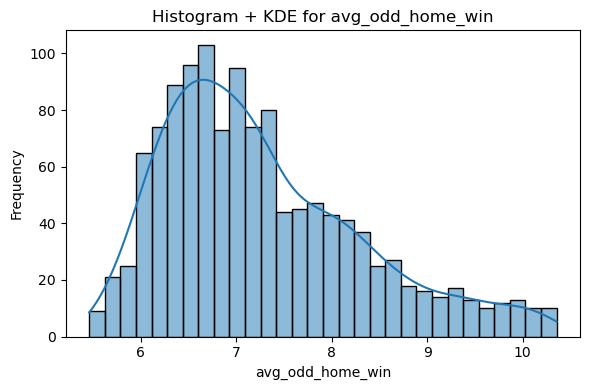

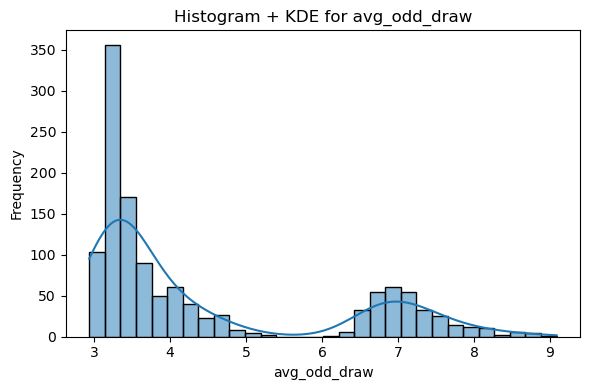

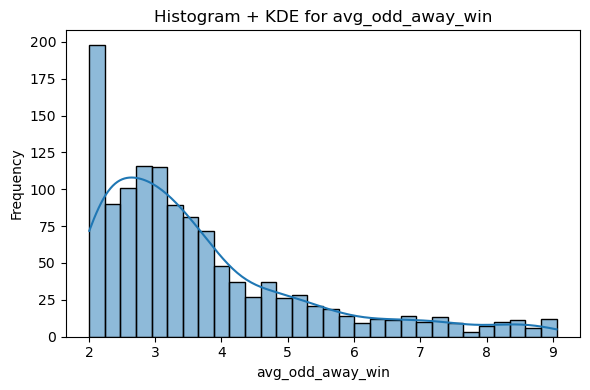

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolonner der kan bruges til KDE + histogram (numeriske)
numerical_cols = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']

for column in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram + KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


### Interpretation of the Histograms with KDE for Betting Odds

Each plot displays the distribution of a specific betting odd type:

- **Home Win Odds (`avg_odd_home_win`)**:  
  The histogram shows the frequency of average odds for home team victories. Most values are concentrated between roughly 1.5 and 2.5, indicating that home teams are often favored to win, but not overwhelmingly.

- **Draw Odds (`avg_odd_draw`)**:  
  This distribution is generally more centered, often peaking around 3.0. This reflects that draws are considered moderately likely but less frequent than home wins, according to the betting markets.

- **Away Win Odds (`avg_odd_away_win`)**:  
  These odds tend to be higher, often peaking above 3.0 and stretching further. This indicates that away teams are usually considered underdogs, and higher odds are offered for away victories.

The KDE (Kernel Density Estimate) line over each histogram smooths out the distribution, making it easier to observe the central tendency and skewness of each odds type:
- If the KDE is skewed to the right (long tail to the right), higher odds occur less frequently.
- If it's more symmetric, the outcomes are more evenly distributed.

## Home Team Ranking Distribution

Displays the frequency of each home team ranking.

In [10]:
df['home_ranking'].value_counts().sort_index()

home_ranking
1     50
2     48
3     45
4     39
5     55
6     61
7     69
8     64
9     71
10    62
11    74
12    70
13    69
14    70
15    66
16    69
17    63
18    66
19    67
20    68
Name: count, dtype: int64

## Away Team Ranking Distribution

Displays the frequency of each away team ranking.


In [11]:
df['away_ranking'].value_counts().sort_index()

away_ranking
1     57
2     63
3     58
4     56
5     68
6     73
7     63
8     67
9     63
10    58
11    67
12    65
13    61
14    66
15    62
16    58
17    61
18    60
19    55
20    65
Name: count, dtype: int64

looks like they have been an error with team ranking 18-19 that might have been combined into 20 which would explain why it is so much larger then the others

## Correlation Heatmap of Numerical Features

Shows the correlation between numerical variables in the dataset.


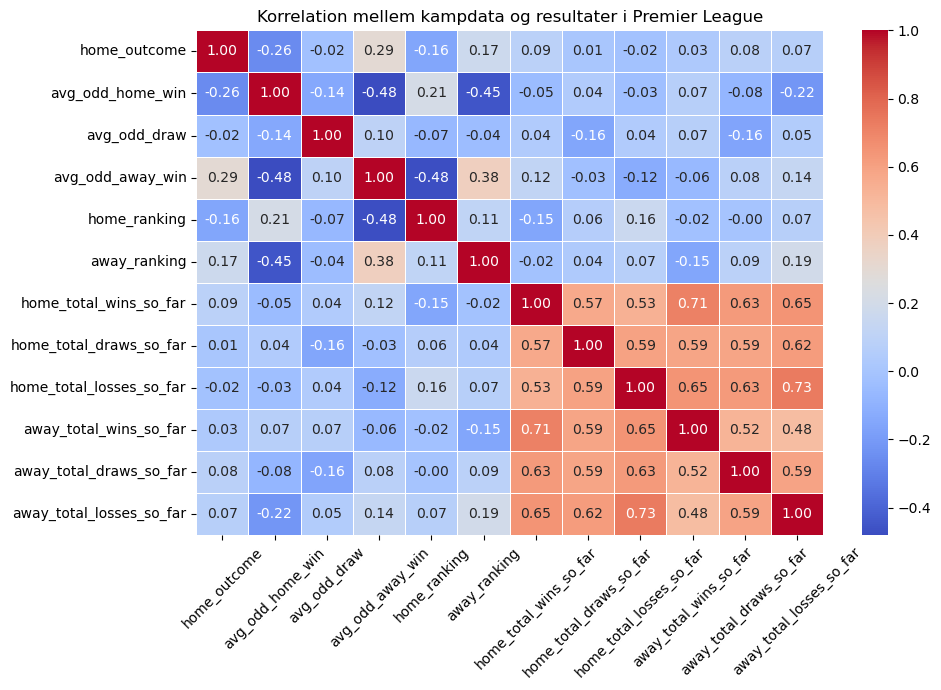

In [12]:
# Re-define df_new due to previous kernel reset
df_new = pd.read_csv(r'C:\Users\umair\Desktop\CphBusiness\4. Sem\BI\betting-BI\data\cleaned-premier-label.csv')

# Keep only numerical columns
only_numerical_df = df_new.select_dtypes(include='number')

# Calculate correlation matrix
corr = only_numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelation mellem kampdata og resultater i Premier League')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Key Insights from the Correlation Heatmap

#### 1. **Odds Reflect Match Outcomes**
- **`home_outcome` is negatively correlated with `avg_odd_home_win` (-0.26)** and positively with `avg_odd_away_win` (0.29).
  - This means that when the odds for a home win are low (home team is favored), the home team tends to win more often — which aligns with typical betting logic.

#### 2. **Home and Away Odds Are Strongly Linked**
- **`avg_odd_home_win` and `avg_odd_away_win` show a strong negative correlation (-0.48)**:
  - If the home team is strongly favored (low odds), the away team is considered less likely to win (high odds), and vice versa.

#### 3. **Cumulative Match Statistics Are Interrelated**
- There are strong positive correlations between:
  - `home_total_wins_so_far`, `home_total_draws_so_far`, and `home_total_losses_so_far` (0.53–0.71),
  - The same applies to the away team's stats.
  - This makes sense, as all results accumulate over the season — more matches played means more of each result type.

#### 4. **Stronger Teams Reduce Opponent Odds**
- **`home_ranking` is negatively correlated with `avg_odd_away_win` (-0.48)**:
  - A lower ranking number (i.e., a higher-ranked team) correlates with lower chances for the away team to win, hence higher away win odds.


## Applying PCA on Numerical Data

PCA (Principal Component Analysis) is performed on all numerical columns to reduce dimensionality and explore variance structure.


In [13]:
# Keep only numeric columns for PCA
numeric_df = df.select_dtypes(include='number')

# Fit PCA on numeric data
pca = PCA()
pca_data = pca.fit_transform(numeric_df)

pca_data

array([[-1.18612807e+01,  1.12825119e+01,  2.94748396e+00, ...,
         6.22676715e-01,  7.28035178e-01, -1.01443434e+00],
       [-1.32573867e+01, -6.56153303e+00, -7.65348046e+00, ...,
         3.43250191e+00,  1.44801000e+00, -3.67912068e-01],
       [-1.20735664e+01,  7.63528031e+00, -5.37546938e+00, ...,
         3.37982125e-01,  4.25103518e-01, -1.75532299e-01],
       ...,
       [ 1.39443620e+01,  9.53391428e+00,  7.84839100e-02, ...,
         2.15272169e+00,  7.46747109e-01, -2.08894070e-03],
       [ 1.58288631e+01, -9.48869788e+00, -5.68592730e+00, ...,
        -1.51474071e+00, -6.00466761e-01, -7.09749779e-01],
       [ 1.61137773e+01,  2.70892818e+00,  9.30776839e-01, ...,
        -1.30859118e+00, -1.70108010e-02, -1.17785490e+00]])

## Explained Variance Ratio of Principal Components

Displays the proportion of total variance explained by each principal component.  
This helps determine how many components are needed to capture most of the information in the dataset.


In [14]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.38954147, 0.22768956, 0.18691341, 0.05310796, 0.04275856,
       0.03268204, 0.02497407, 0.01448445, 0.01270242, 0.00736174,
       0.00425593, 0.00352839])

## Scree Plot of Principal Component Variance

A scree plot showing how much variance each principal component explains.  
This visualization helps identify the "elbow point" — the optimal number of components to retain for dimensionality reduction.


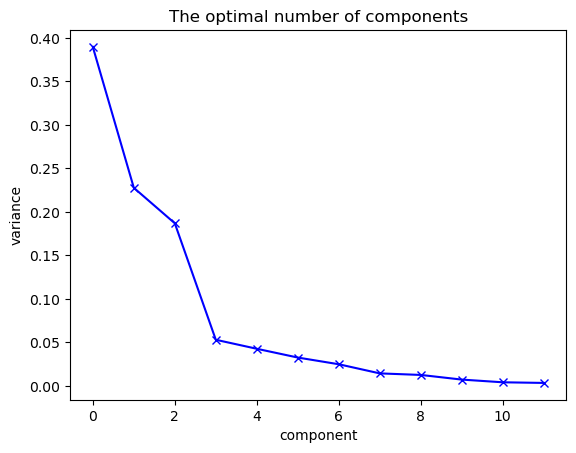

In [15]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

### Interpretation of the Scree Plot

The scree plot visualizes the explained variance of each principal component. Key observations:

- **The first component explains ~39%** of the total variance — the most informative.
- **The second and third components explain ~22% and ~19%**, respectively.
- After the third component, the explained variance drops significantly, indicating diminishing returns.

The "elbow point" occurs around **component 3**, suggesting that **the first 3 components capture most of the meaningful variance** in the data. 

## Cumulative Explained Variance

This plot shows how the total explained variance accumulates as more principal components are added.  
It helps determine the number of components needed to retain a desired amount of total variance (e.g., 90%).


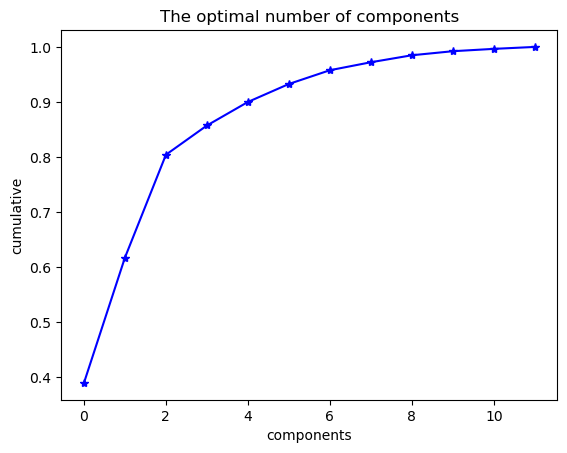

In [16]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

### Interpretation of the Cumulative Explained Variance Plot

This plot shows how much of the total variance is captured as more principal components are added.

#### Key Observations:
- The **first 3 components explain over 80%** of the total variance.
- With **5 components**, the cumulative explained variance exceeds **90%**.
- After that, the curve flattens, meaning additional components add minimal new information.

#### Conclusion:
Selecting the **first 3 to 5 components** is likely sufficient to retain most of the information in the data while reducing dimensionality significantly.


## Boxplots of Betting Odds

Displays individual boxplots for home win, draw, and away win odds.  
Boxplots help identify the distribution, central values, and potential outliers for each odds type.


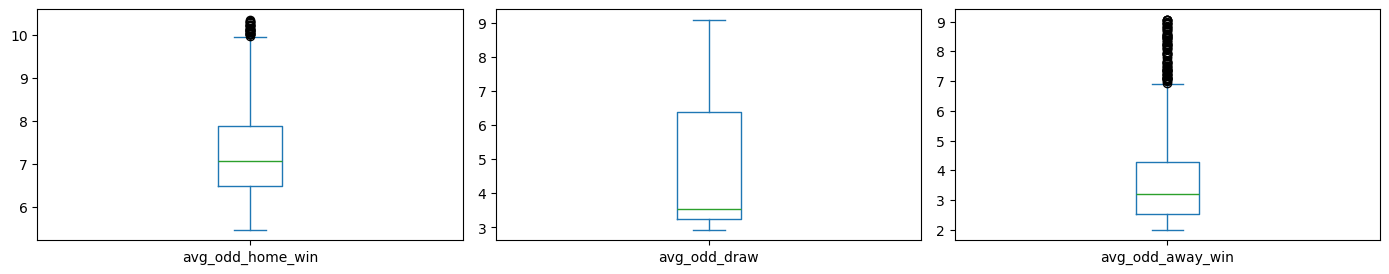

In [17]:
# Udvælg de ønskede kolonner
columns_to_plot = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win'
]

# Lav boxplots med subplots
df[columns_to_plot].plot(
    kind='box',
    subplots=True,
    layout=(3, 3),  # 3x3 grid for at få god plads
    sharex=False,
    sharey=False,
    figsize=(14, 8),
    whis=1.5
)

plt.tight_layout()
plt.show()


### Interpretation of Boxplots for Betting Odds

The boxplots show the distribution of average betting odds for home wins, draws, and away wins:

- **`avg_odd_home_win`**:
  - The median is around 6.8.
  - There are several **outliers above 10**, indicating rare matches where the home team was a strong underdog.
  - The interquartile range is relatively wide, showing moderate variability.

- **`avg_odd_draw`**:
  - A more **symmetric and centered** distribution with a median around 3.5.
  - Less variation and fewer outliers compared to the other odds types.

- **`avg_odd_away_win`**:
  - Lower median (~3.0), but a high number of **outliers above 7**, suggesting that away teams are often considered underdogs.
  - The distribution is **right-skewed**, indicating more high-value odds.

#### Summary:
- **Draw odds** are the most stable and predictable.
- **Away win odds** have the most extreme values (outliers).
- These **outliers** may be worth further investigation, as they could indicate surprising or unusual match outcomes.
